# How to predict house prices using machine learning algorithms?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

pd.options.display.max_rows = 20

In [24]:
df = pd.read_csv('train.csv', index_col=0)
display(df)

df.shape


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


(1460, 80)

In [12]:
# Wat columns do we all have? (Note that these are all described on the Kaggle website)
# I list these because some have a different name on Kaggle than in the data, so to prevent errors on column names
# For instance, on Kaggle is the name Bedroom: Number of bedrooms above basement level, 
# while in the data this column name does not exist and is replaced by BedroomAbvGr
list(df.columns)


['MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'Enc

In [25]:
obj = (df.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Number of categorical variables:",len(object_cols))
 
int_ = (df.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Number of integer variables:",len(num_cols))
 
fl = (df.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Number of float variables:",len(fl_cols))

Number of categorical variables: 43
Number of integer variables: 34
Number of float variables: 3


# Explore the target variable 

Statistics for Boston housing dataset:

Minimum price: $34900
Maximum price: $755000
Mean price: $180921.2
Median price $163000.0
Standard deviation of prices: $79415.3 



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc2f79c6e20>]],
      dtype=object)

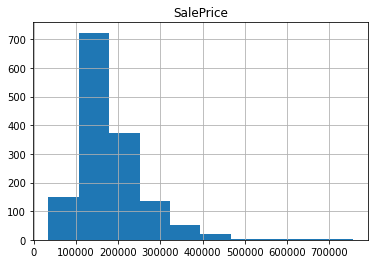

In [22]:
price = df["SalePrice"]

# CALCULATE STATISTICS OF THE TARGET VARIABLE SALEPRICES
# Minimum price of the data
minimum_price = np.amin(price)

# Maximum price of the data
maximum_price = np.amax(price)

# Mean price of the data
mean_price = round(np.mean(price),1)

# Median price of the data
median_price = round(np.median(price),1)

# Standard deviation of prices of the data
std_price = round(np.std(price),1)

# Show the calculated statistics
print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${}".format(minimum_price)) 
print("Maximum price: ${}".format(maximum_price))
print("Mean price: ${}".format(mean_price))
print("Median price ${}".format(median_price))
print("Standard deviation of prices: ${}".format(std_price) ,"\n")

# EXPLORE THE DISTRIBUTION OF THE SALEPRICES
df.hist(column='SalePrice')
# Conclusion: the sale prices are right skewed

# Goal: Predict the SalePrice (the property's sale price in dollars) based on the other columns.


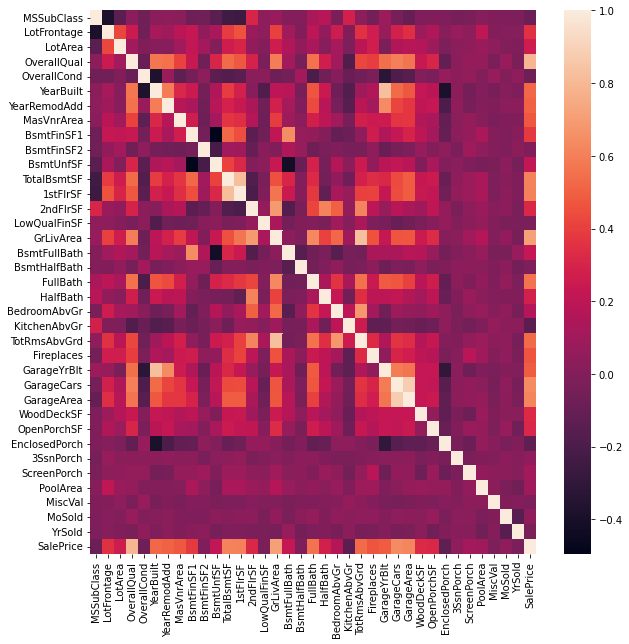

In [18]:
# Lets explore the correlations in our data set 
plt.figure(figsize=(10,10))
sns.heatmap(df.corr())

# The correlation measure used here is Pearson’s correlation. 
# In our case the lighter the square the stronger the correlation between two variables.


# First, we need to clean the data (duplicate rows, NaN values, N/A values, etc.)


In [27]:
# remove all dulpicate rows
df = df.drop_duplicates()
df.shape

(1460, 80)